# Getting Started with Matplotlib
We need `matplotlib.pyplot` for plotting.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Plotting lines

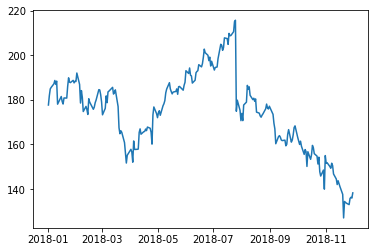

In [2]:
fb = pd.read_csv(
    'data/fb_stock_prices.csv', index_col='Date', parse_dates=True
)

plt.plot(fb.index, fb.Open)
plt.show()

Since we are working in a Jupyter notebook, we can use the magic command `%matplotlib inline` once and not have to call `plt.show()` for each plot.

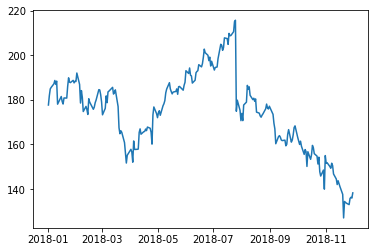

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv(
    'data/fb_stock_prices.csv', index_col='Date', parse_dates=True
)
plt.plot(fb.index, fb.Open)

## Scatter plots

We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with `'k--'` or a red scatter plot with `'ro'`:

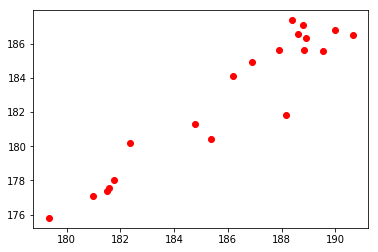

In [4]:
plt.plot('High', 'Low', 'ro', data=fb.head(20))

## Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

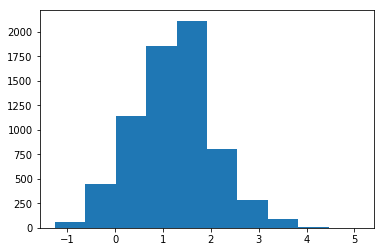

In [5]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

### Bin size matters
Notice how our assumptions of the distribution of the data can change based on the number of bins:

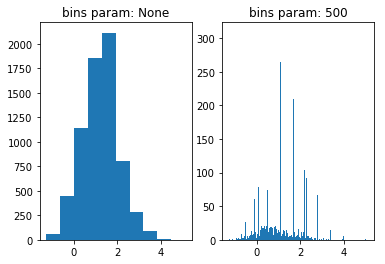

In [6]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2)
for ax, bins in zip(axes, [None, 500]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

## Matplotlib plot components
### `Figure`
Top-level object that holds the other plot components.

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

### `Axes`
Individual plots contained within the `Figure`.

## Creating subplots
Simply specify the number of rows and columns to create:

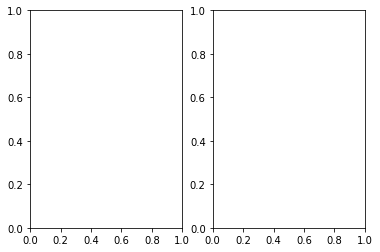

In [8]:
fig, axes = plt.subplots(1, 2)

As an alternative to using `plt.subplots()` we can add the `Axes` to the `Figure` on our own. This allows for some more complex layouts, such as picture in picture:

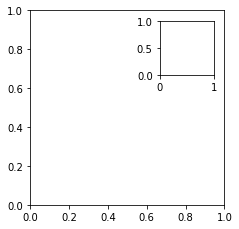

In [9]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

## Creating Plot Layouts with `gridspec`
We can create subplots with varying sizes as well:

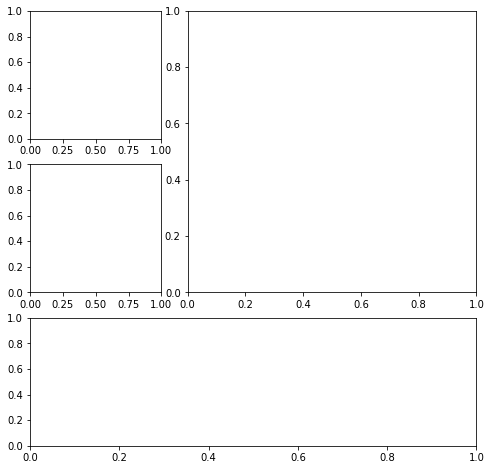

In [10]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

## Saving plots
Use `plt.savefig()` to save the last created plot. To save a specific `Figure` object, use its `savefig()` method.

In [11]:
fig.savefig('empty.png')

## Cleaning up
It's important to close resources when we are done with them. We use `plt.close()` to do so. If we pass in nothing, it will close the last plot, but we can pass the specific `Figure` to close or say `'all'` to close all `Figure` objects that are open. Let's close all the `Figure` objects that are open with `plt.close()`:

In [12]:
plt.close('all')

## Additional plotting options
### Specifying figure size
Just pass the `figsize` parameter to `plt.figure()`. It's a tuple of (width, height):

In [13]:
fig = plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

This can be specified when creating subplots as well:

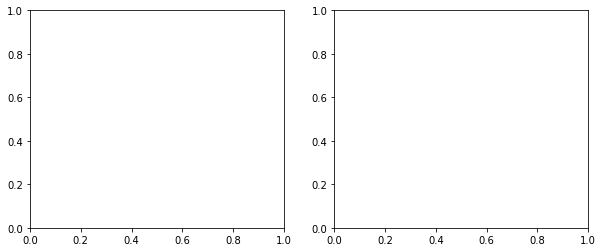

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

### `rcParams`
A small subset of all the available plot settings:

In [15]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.axisbelow',
 'axes.labelweight',
 'boxplot.capprops.linestyle',
 'boxplot.meanline',
 'boxplot.whiskers',
 'datapath',
 'date.autoformatter.microsecond',
 'figure.constrained_layout.hspace',
 'font.sans-serif',
 'font.variant',
 'interactive',
 'keymap.forward',
 'lines.dash_capstyle',
 'lines.solid_capstyle',
 'pgf.texsystem',
 'ps.distiller.res',
 'xtick.bottom',
 'xtick.major.width',
 'ytick.major.left',
 'ytick.major.right']

We can check the current default `figsize` using `rcParams`:

In [16]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

We can also update this value to change the default (until the kernel is restarted):

In [17]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use `rcdefaults()` to restore the defaults:

In [18]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via `pyplot`:

In [19]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default